# HyperParameter Tuning

This notebook serves to show the hyperparameter tuning process.

## TODO
1. Figure out what is the best.

# Imports/Setups

In [1]:
from Model import tuning
from Model import utility as model_utility
from Data import utility as data_utility
from Objectives import losses
from Model import scipy
from Evaluation import utility as eval_utility

/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /data/users/jupyter-dam724/.local/lib/python3.9/site-packages/libpyg.so: undefined symbol: _ZN3c1010Dispatcher17runRecordFunctionERN2at14RecordFunctionESt17reference_wrapperIKNS_14FunctionSchemaEENS_11DispatchKeyE
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /data/users/jupyter-dam724/.local/lib/python3.9/site-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/data/users/jupyter-dam724/.local/lib/python3.9/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred whil

# Device

In [2]:
device_params = {
    'device_pref': 'cuda',
    'ind_dev': 3
}

device = data_utility.set_device(**device_params)

Now using GPU.


# Tuning/Buffer

Saving buffer, finding best configurations.

In [3]:
run_tune = False

In [4]:
loss_params = ( 
    (1e-2, 1e-4, 1e-6), # l1s
    (1, 1e-2, 1e-5), # invs
    (1, 1e-5), # devs
    (1, 1e-2)  # conds
)

sym_chol_params = {
    'n': 25,
    'hidden': 256,
    'batch_size': 0,
    'sparse_tol': 1e-2,
    'diagonal_bias': 0.1
}
ind_params = {
    'n': 25,
    'hidden': 512,
    'batch_size': 0,
    'sparse_tol': 1e-2,
    'diagonal_bias': 0.1
}
lu_params = {
    'n': 25,
    'hidden': 128,
    'batch_size': 0,
    'sparse_tol': 1e-2,
    'diagonal_bias': 0.1
}

models = (
    ('ind', ind_params),
    ('sym', sym_chol_params),
    ('lu', lu_params),
    ('chol', sym_chol_params)
)
training_params = (
    (1e-4, 1e-6),
    (32,)
)
buffer = '/data/users/jupyter-dam724/RL/precondition-discovery-contextual-bandit/Buffer'

hyper_params = {
    'loss_params': loss_params,
    'models': models,
    'training_params': training_params,
    'epoches': 30,
    'device': device,
    'buffer_path': buffer,
    'size': 25,
    't_len': 1000,
    'save_freq': 150
}

In [5]:
if run_tune:
    param_log = tuning.hyperparam_tuning(**hyper_params)

# Visualize 

Look at the training plots, instances of each model (there are 864 models, each with at most 200 data points, so be selective).

## Buffer Dataset

Gather all of the hyperparameter tuning data for both a singular dataset and lookup.

In [6]:
directory = '/data/users/jupyter-dam724/RL/precondition-discovery-contextual-bandit/Buffer'

In [7]:
files = model_utility.get_torch_files(directory)

In [8]:
all_params = model_utility.group_files_by_parameters(files)

In [9]:
single_params = model_utility.group_files_by_single_parameters(files)

## Best Combination

Finding the best parameter combination.

## Best Parameters

Look at best parameters and parameter combos.

### Model

========[Evaluating "model"]========

++++++++[Running over "lu"]++++++++
SIZE: 12291
Mean residuals (Minimum): 4.474478721618652
Mean residuals (Maximum): 256.6552734375
Minimum: 7.145810127258301
Maximum: 913.3462524414062
Average: 68.79550388095804

++++++++[Running over "ind"]++++++++
SIZE: 10640
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.7116618156433105
Mean residuals (Maximum): 4.16069221496582
Minimum: 6.5915207862854
Maximum: inf
Average: inf

++++++++[Running over "chol"]++++++++
SIZE: 15120
Mean residuals (Minimum): 0.004686564207077026
Mean residuals (Maximum): 0.0004426100349519402
Minimum: 9.185345649719238
Maximum: 1784.0106201171875
Average: 158.94777211966337

++++++++[Running over "sym"]++++++++
SIZE: 12572
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 6.181424140930176
Mean residuals (Maxi

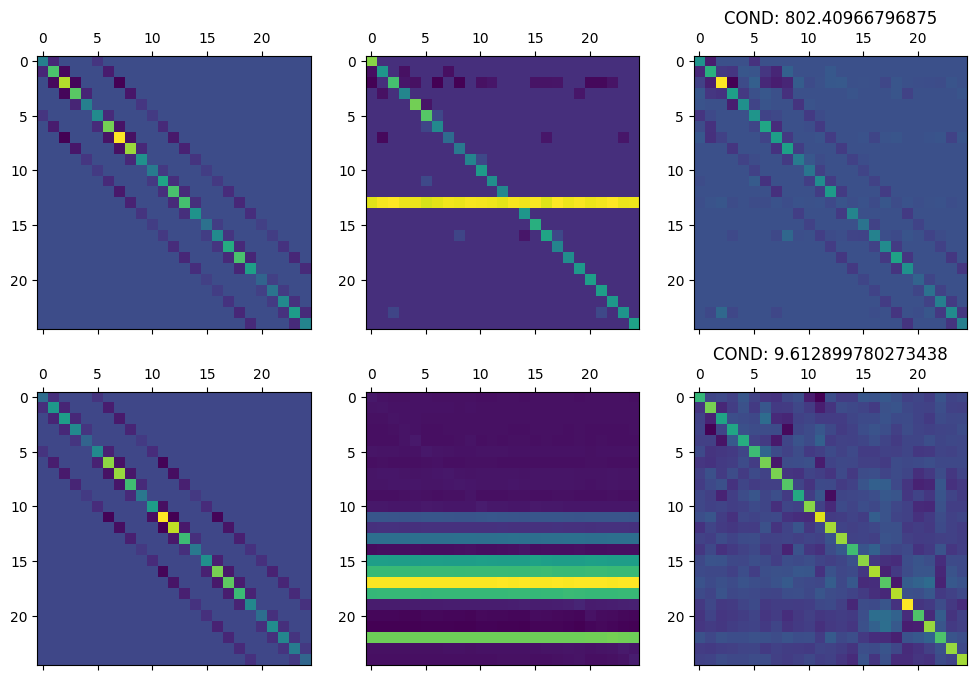

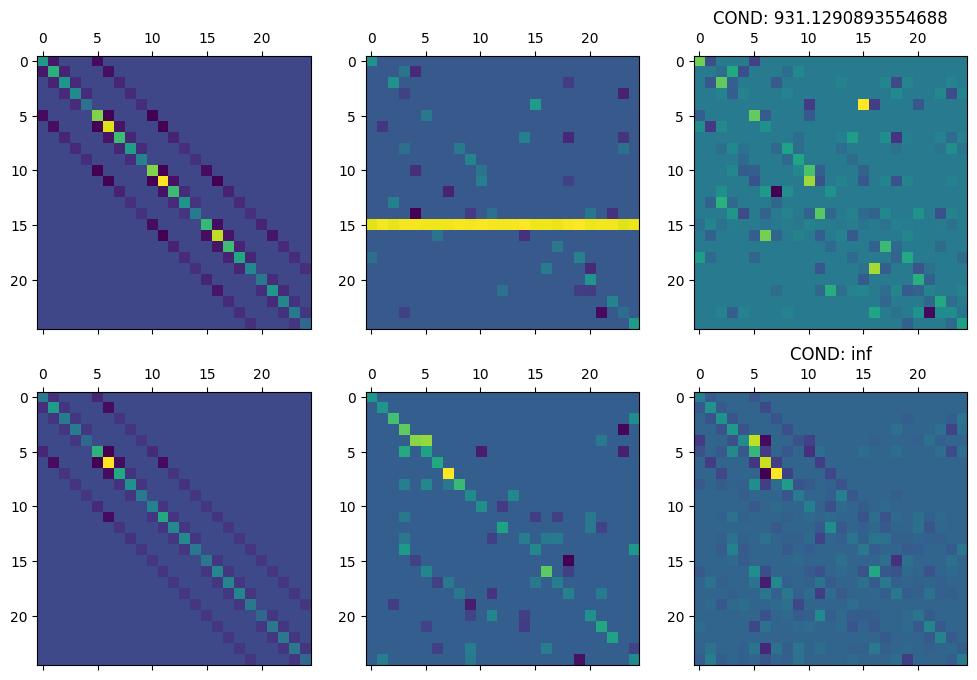

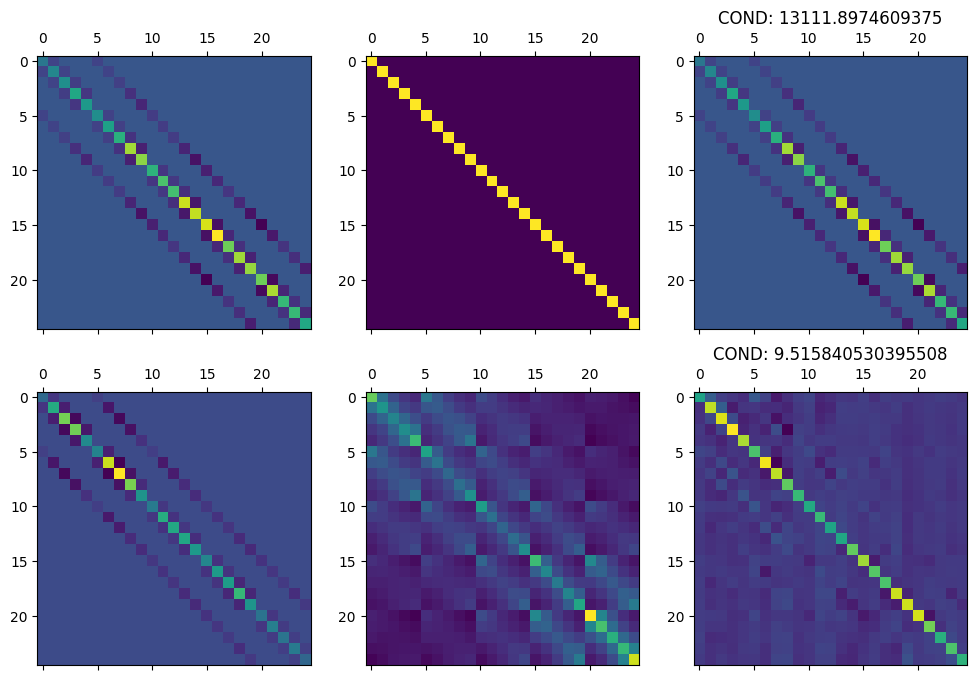

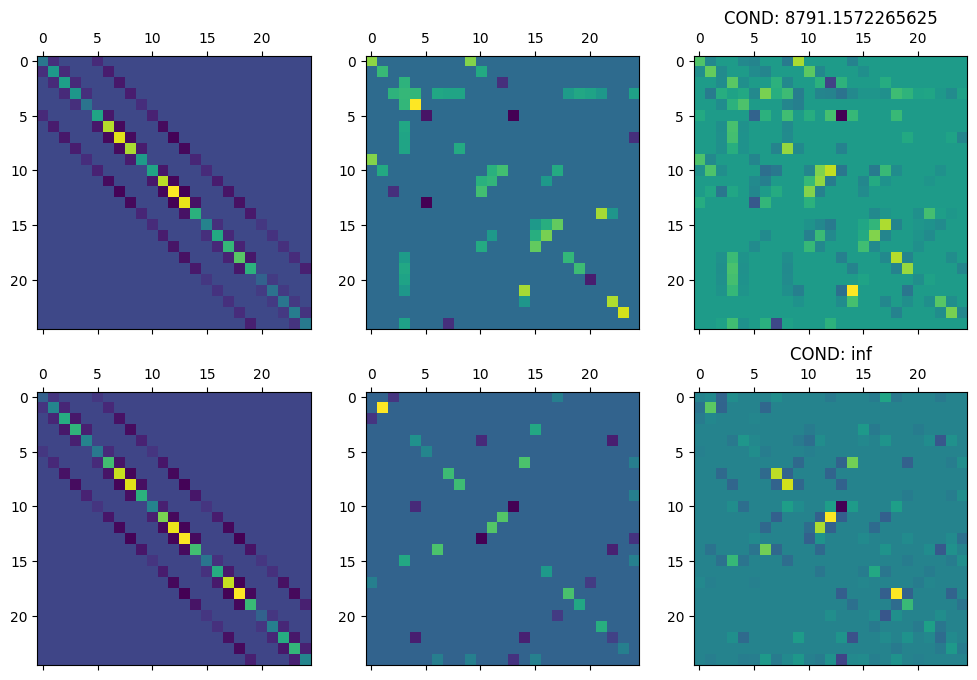

In [10]:
loss_params = {
    'l1': 1e-2,
    'inv': 1e-2,
    'dev': 1e-2,
    'cond': 1.0,
    'batch_size': 32,
    'size': 25
}
criterion = losses.CondEyeDistance(**loss_params)

eval_params = {
    'single_params': single_params, 
    'parameter': 'model', 
    'criterion': criterion, 
    'directory': directory, 
    'device': device,
    'timeit': False,
    'size': (12, 8)
}
eval_utility.evaluate_parameters(**eval_params)

### Learning Rate

========[Evaluating "lr"]========

++++++++[Running over "1e-06"]++++++++
SIZE: 28022
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 3.3138654232025146
Mean residuals (Maximum): 6.3495001792907715
Minimum: 7.674006938934326
Maximum: inf
Average: inf

++++++++[Running over "0.0001"]++++++++
SIZE: 22601
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.965179443359375
Mean residuals (Maximum): 4.830066680908203
Minimum: 6.5915207862854
Maximum: inf
Average: inf


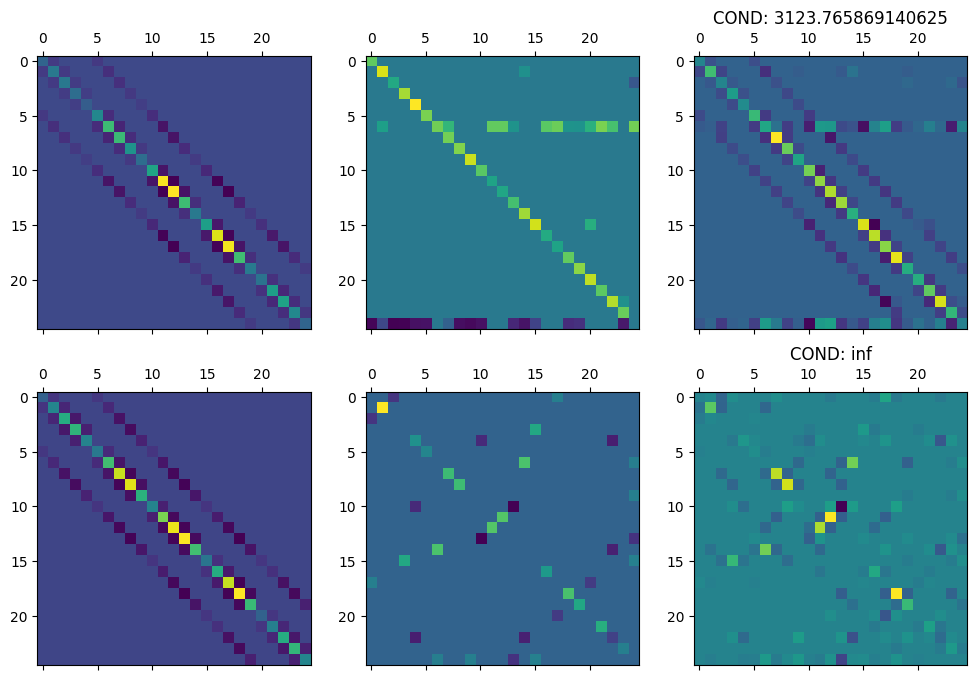

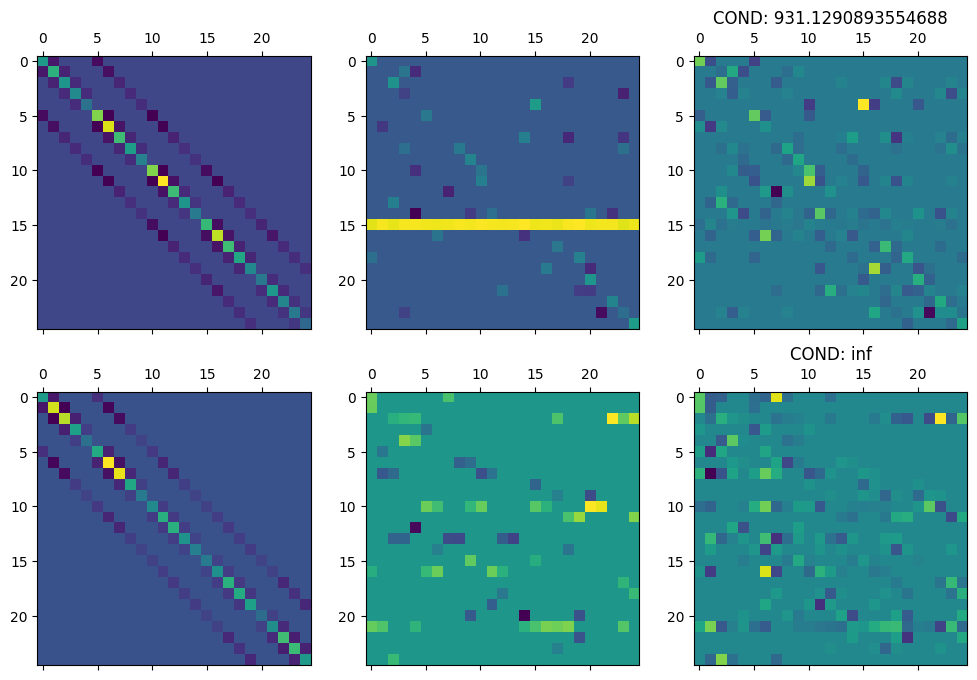

In [12]:
loss_params = {
    'l1': 1e-2,
    'inv': 1e-2,
    'dev': 1e-2,
    'cond': 1.0,
    'batch_size': 32,
    'size': 25
}
criterion = losses.CondEyeDistance(**loss_params)

eval_params = {
    'single_params': single_params, 
    'parameter': 'lr', 
    'criterion': criterion, 
    'directory': directory,
    'device': device,
    'timeit': False,
    'size': (12, 8)
}
eval_utility.evaluate_parameters(**eval_params)

### L1 Weight

========[Evaluating "l1"]========

++++++++[Running over "1e-06"]++++++++
SIZE: 19843
Mean residuals (Minimum): 0.009184726513922215
Mean residuals (Maximum): 0.0005340944044291973
Minimum: 9.572665214538574
Maximum: 1784.0106201171875
Average: 184.67983486678446

++++++++[Running over "0.0001"]++++++++
SIZE: 18363
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.47247314453125
Mean residuals (Maximum): 4.963918685913086
Minimum: 6.876618385314941
Maximum: inf
Average: inf

++++++++[Running over "0.01"]++++++++
SIZE: 12417
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 5.035368919372559
Mean residuals (Maximum): 4.735570430755615
Minimum: 6.5915207862854
Maximum: inf
Average: inf


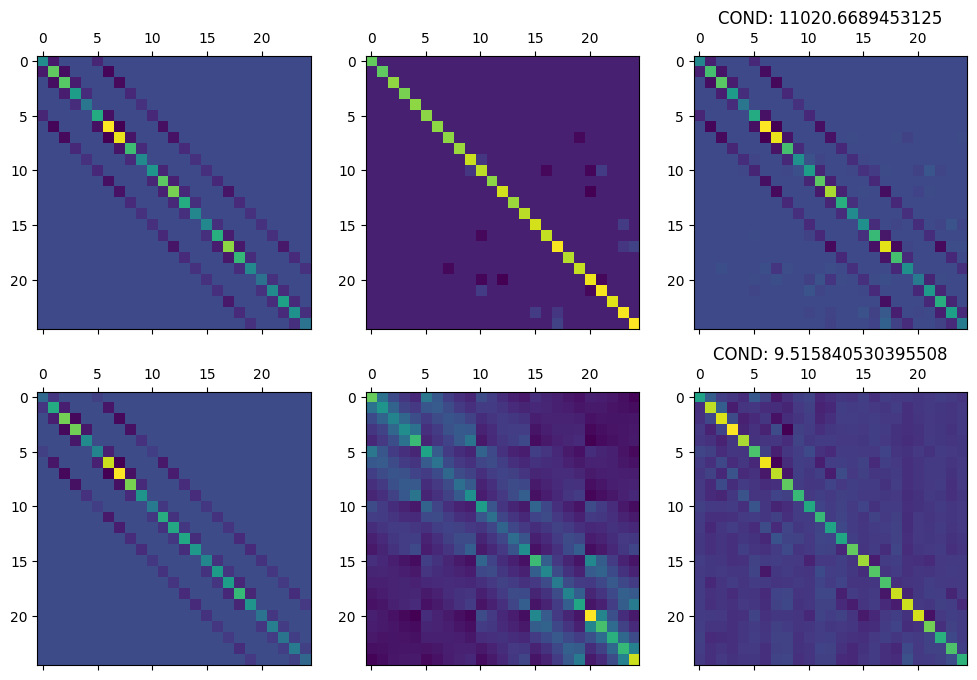

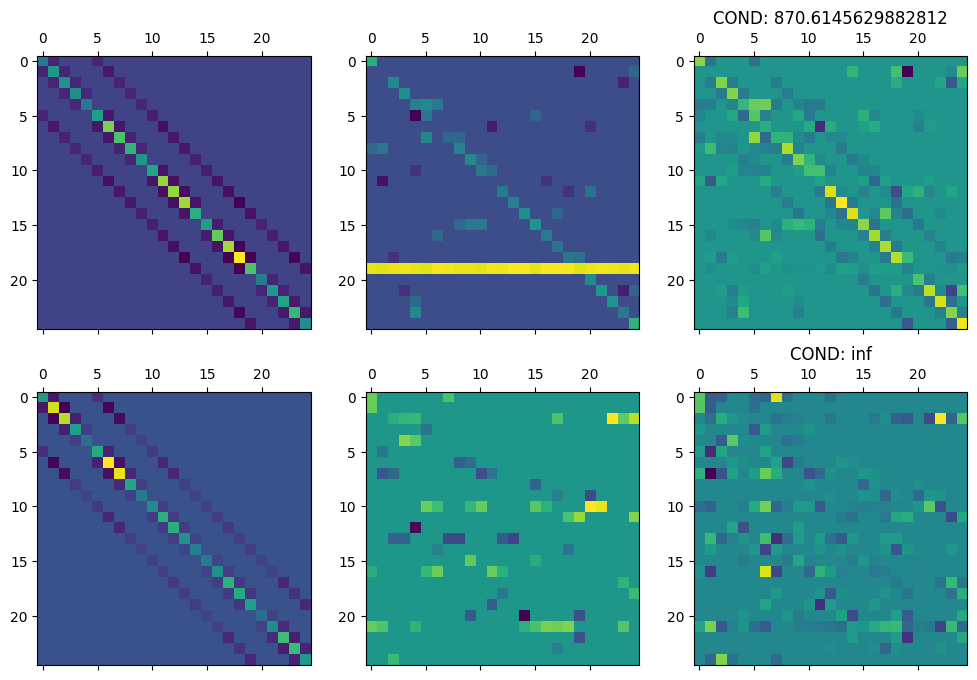

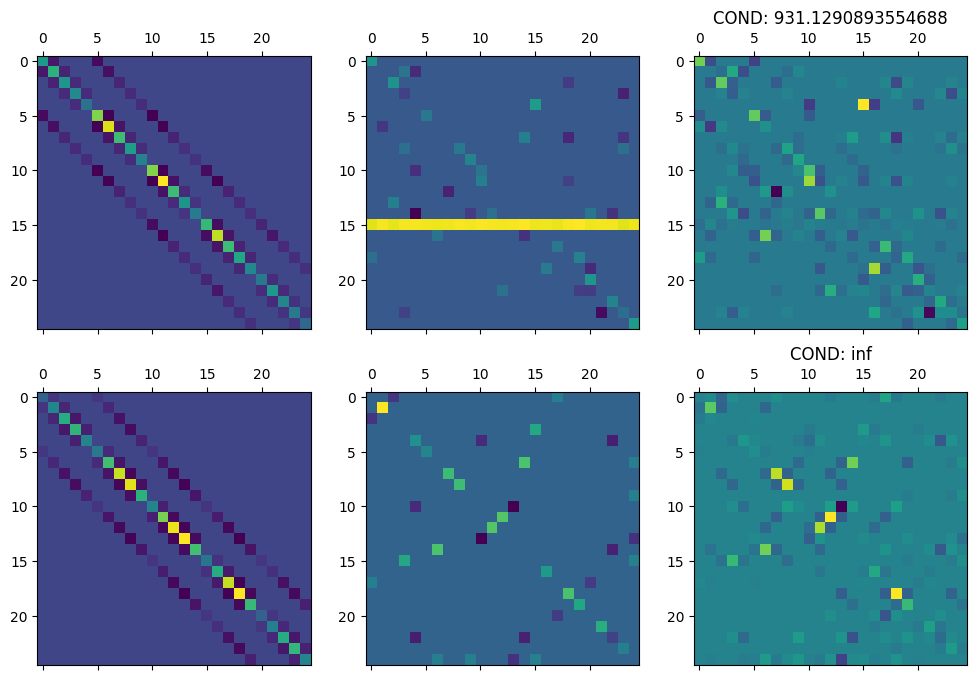

In [13]:
loss_params = {
    'l1': 1e-2,
    'inv': 1e-2,
    'dev': 1e-2,
    'cond': 1.0,
    'batch_size': 32,
    'size': 25
}
criterion = losses.CondEyeDistance(**loss_params)

eval_params = {
    'single_params': single_params, 
    'parameter': 'l1', 
    'criterion': criterion, 
    'directory': directory,
    'device': device,
    'timeit': False,
    'size': (12, 8)
}
eval_utility.evaluate_parameters(**eval_params)

### Identity Weight

========[Evaluating "inv"]========

++++++++[Running over "1e-05"]++++++++
SIZE: 15312
Bad value for loss encountered! inf
Mean residuals (Minimum): 6.091893672943115
Mean residuals (Maximum): 4.774746417999268
Minimum: 7.7302703857421875
Maximum: inf
Average: inf

++++++++[Running over "0.01"]++++++++
SIZE: 16582
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.3105854988098145
Mean residuals (Maximum): 6.926924705505371
Minimum: 6.876618385314941
Maximum: inf
Average: inf

++++++++[Running over "1"]++++++++
SIZE: 18729
Mean residuals (Minimum): 4.922584056854248
Mean residuals (Maximum): 0.0004399330646265298
Minimum: 6.5915207862854
Maximum: 1434.7861328125
Average: 74.23611579055151


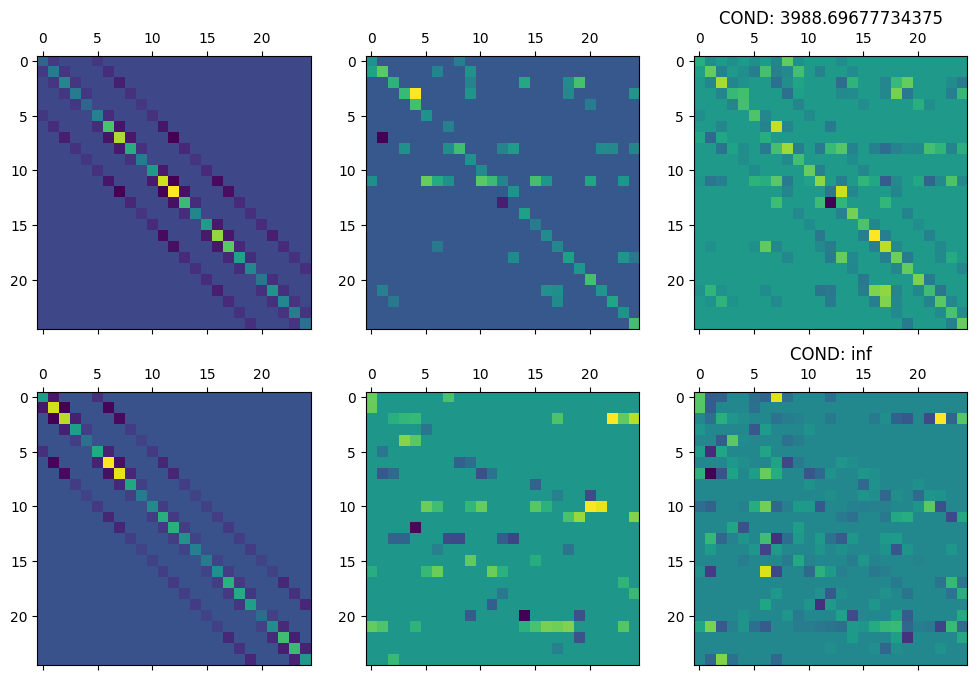

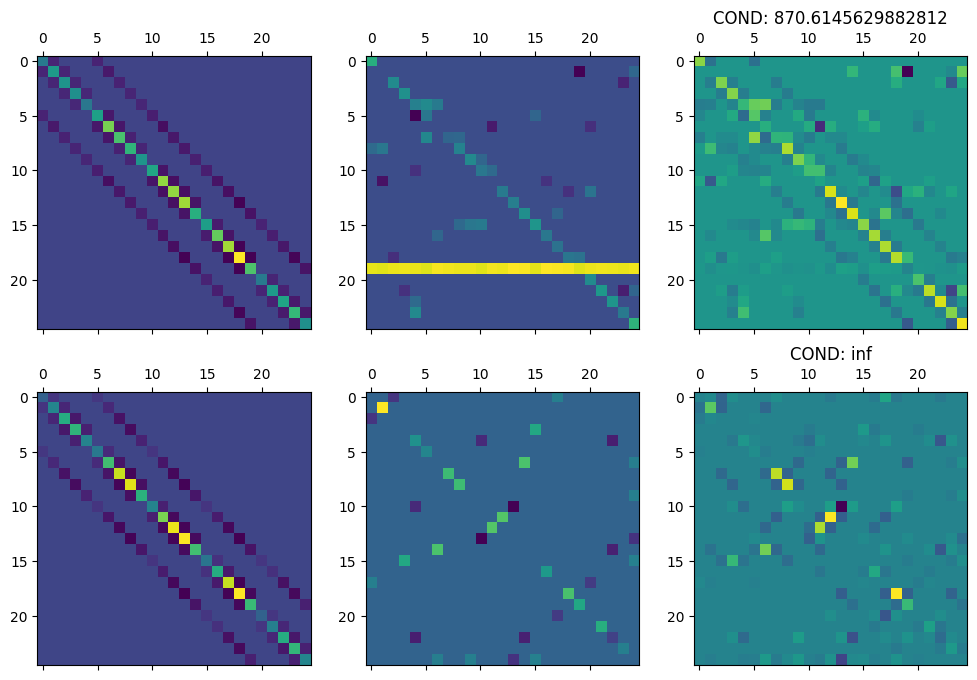

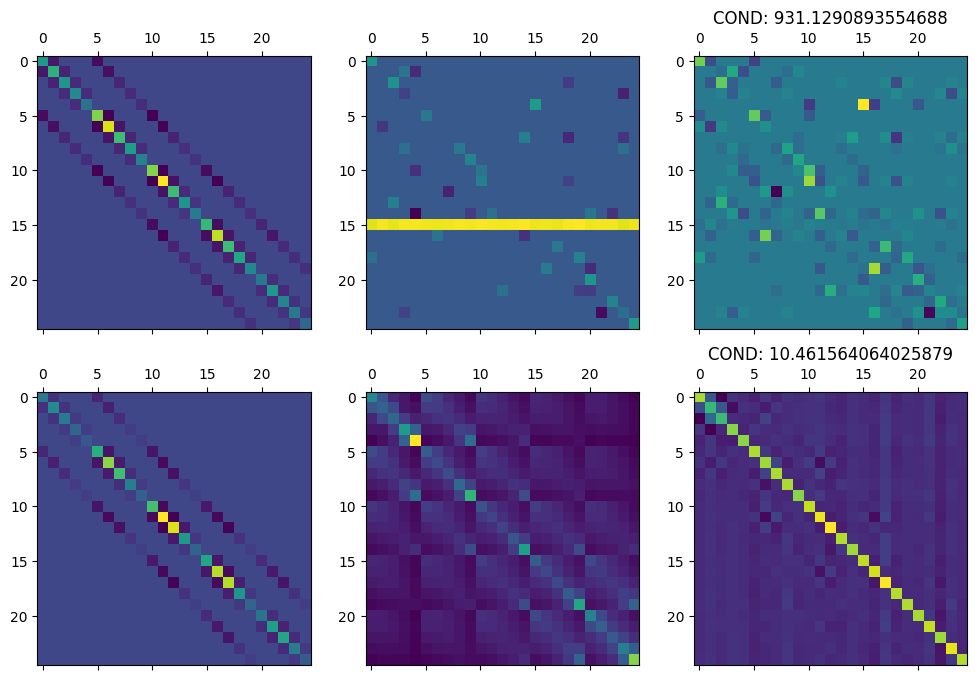

In [14]:
loss_params = {
    'l1': 1e-2,
    'inv': 1e-2,
    'dev': 1e-2,
    'cond': 1.0,
    'batch_size': 32,
    'size': 25
}
criterion = losses.CondEyeDistance(**loss_params)

eval_params = {
    'single_params': single_params, 
    'parameter': 'inv', 
    'criterion': criterion, 
    'directory': directory,
    'device': device,
    'timeit': False,
    'size': (12, 8)
}
eval_utility.evaluate_parameters(**eval_params)

### Deviation Weight

========[Evaluating "dev"]========

++++++++[Running over "1e-05"]++++++++
SIZE: 24419
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.829652786254883
Mean residuals (Maximum): 4.686466693878174
Minimum: 6.5915207862854
Maximum: inf
Average: inf

++++++++[Running over "1"]++++++++
SIZE: 26204
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.575621604919434
Mean residuals (Maximum): 5.351081848144531
Minimum: 6.821603775024414
Maximum: inf
Average: inf


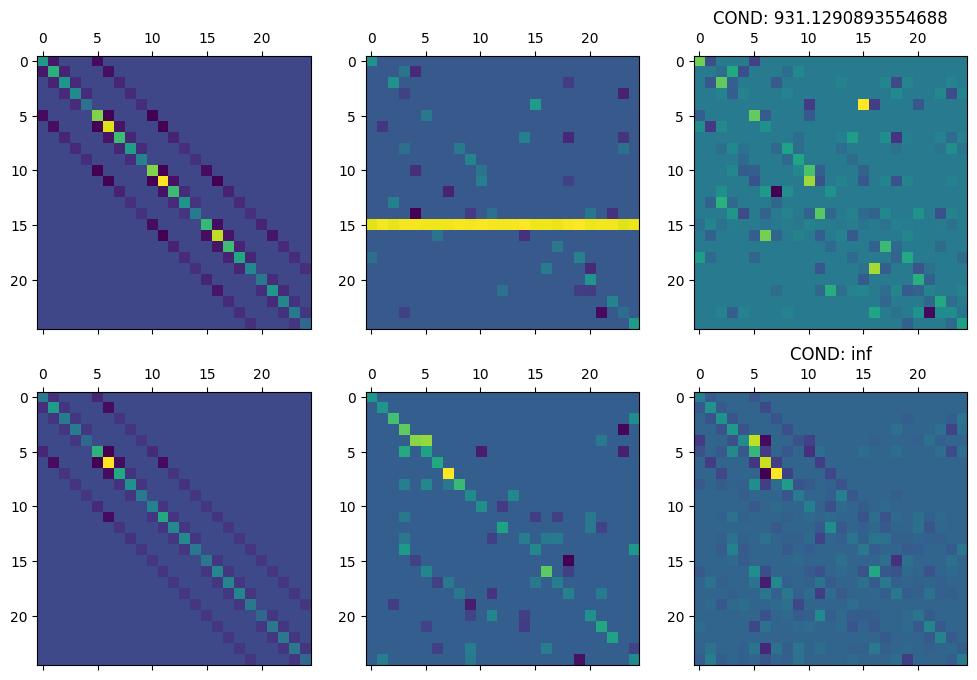

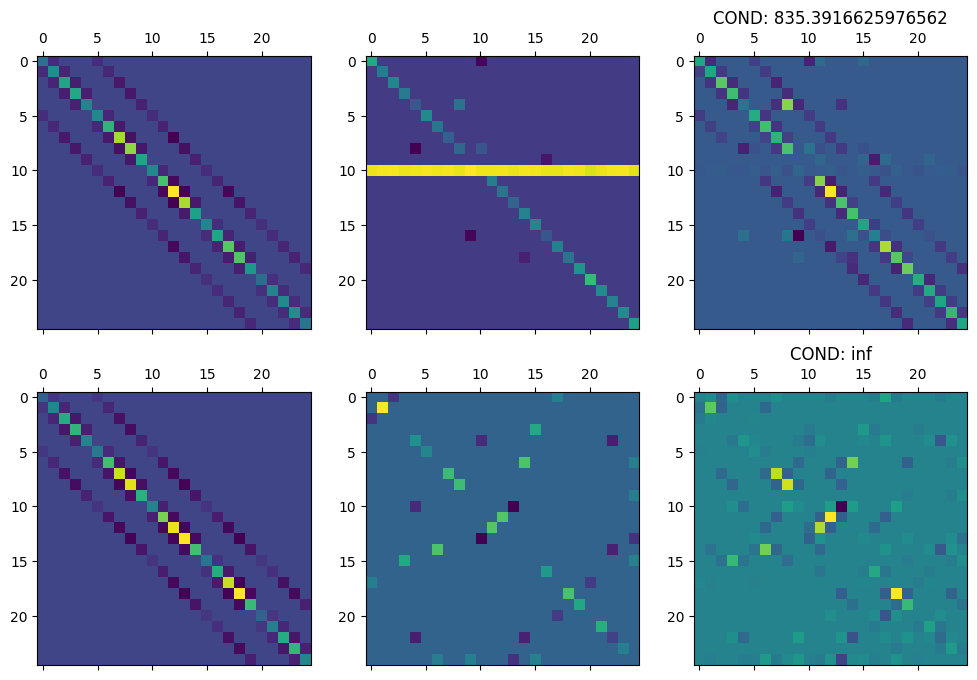

In [15]:
loss_params = {
    'l1': 1e-2,
    'inv': 1e-2,
    'dev': 1e-2,
    'cond': 1.0,
    'batch_size': 32,
    'size': 25
}
criterion = losses.CondEyeDistance(**loss_params)

eval_params = {
    'single_params': single_params, 
    'parameter': 'dev', 
    'criterion': criterion, 
    'directory': directory,
    'device': device,
    'timeit': False, 
    'size': (12, 8)
}
eval_utility.evaluate_parameters(**eval_params)

### Condition Weight

========[Evaluating "cond"]========

++++++++[Running over "1"]++++++++
SIZE: 27121
Mean residuals (Minimum): 4.668120384216309
Mean residuals (Maximum): 0.00045567264896817505
Minimum: 6.5915207862854
Maximum: 1784.0106201171875
Average: 142.57091025760062

++++++++[Running over "0.01"]++++++++
SIZE: 23502
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Bad value for loss encountered! inf
Mean residuals (Minimum): 4.381279945373535
Mean residuals (Maximum): 4.583373546600342
Minimum: 6.876618385314941
Maximum: inf
Average: inf


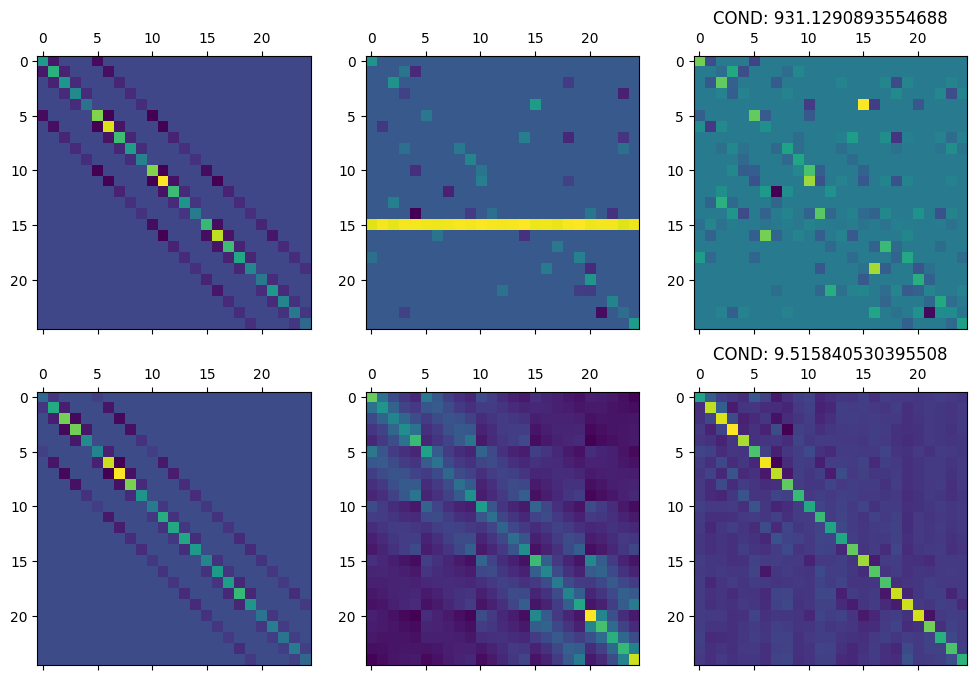

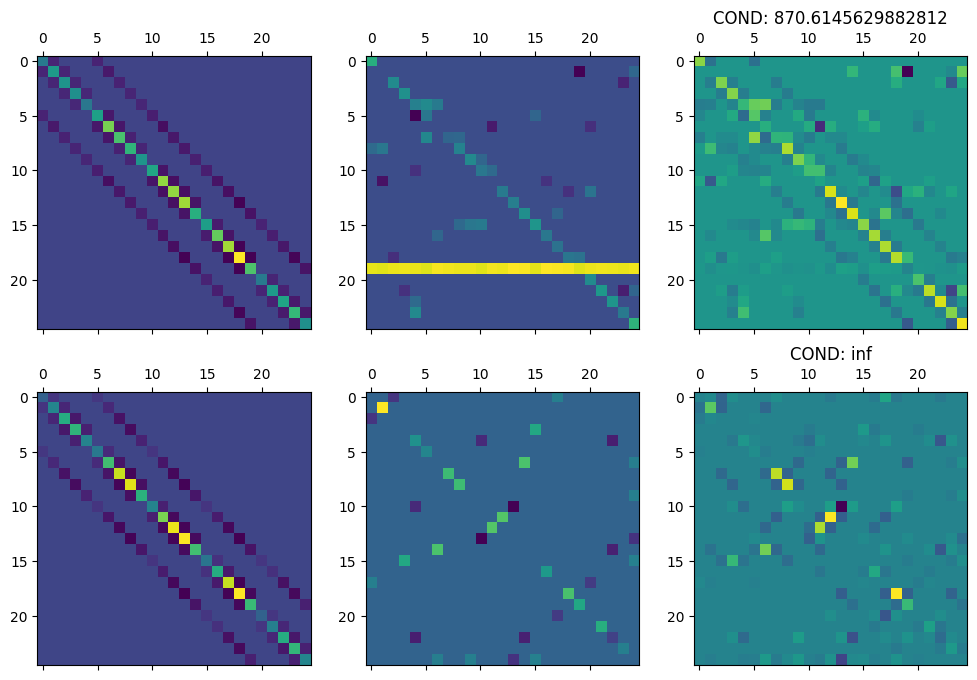

In [16]:
loss_params = {
    'l1': 1e-2,
    'inv': 1e-2,
    'dev': 1e-2,
    'cond': 1.0,
    'batch_size': 32,
    'size': 25
}
criterion = losses.CondEyeDistance(**loss_params)

eval_params = {
    'single_params': single_params, 
    'parameter': 'cond', 
    'criterion': criterion, 
    'directory': directory,
    'device': device,
    'timeit': False, 
    'size': (12, 8)
}
eval_utility.evaluate_parameters(**eval_params)